<a href="https://colab.research.google.com/github/RohanMathur17/Deep-Learning-With-Python-By-Francois-Chollet/blob/master/Chapter%203/CH3_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Classifying Newswires: Multiclass Classification Example**



In [ ]:
from keras.datasets import reuters

(train_data , train_labels), (test_data , test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
print(len(train_data))
print(len(test_data))

8982
2246


In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
#PREPARING THE DATA
import numpy as np

def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):

        results[i, sequence] = 1.
    
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
#One - hot encoding for labels

def to_one_hot(labels, dimension=46):

    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        
        results[i, label] = 1.
    
    return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
#BUILT - IN WAY OF CATEGORICAL ENCODING

#from keras.utils.np_utils import to_categorical

#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))   #46 because we are classifying into 46 different classes , instead of just 2 

In [ ]:
#Compiling your model

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])  

In [ ]:
#Validating your dataset

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 2.6152 - accuracy: 0.5246 - val_loss: 1.7068 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.4350 - accuracy: 0.6968 - val_loss: 1.3427 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0844 - accuracy: 0.7696 - val_loss: 1.1702 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8627 - accuracy: 0.8172 - val_loss: 1.0910 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6922 - accuracy: 0.8550 - val_loss: 1.0142 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5565 - accuracy: 0.8866 - val_loss: 0.9519 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4464 - accuracy: 0.9110 - val_loss: 0.9447 - val_accuracy: 0.7980
Epoch 8/20
16

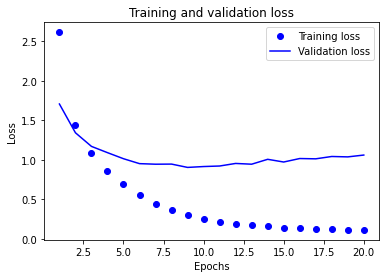

In [ ]:
#Plotting training & validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

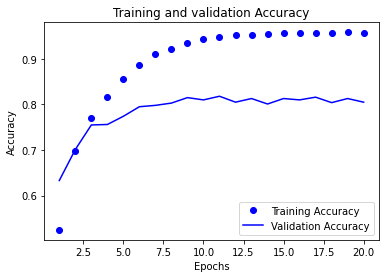

In [ ]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [ ]:
#Overfitting observed after 9 epochs

In [ ]:
#Retraining model

model_1 = models.Sequential()

model_1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(46, activation='softmax'))

model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model_1.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model_1.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 62ms/step - loss: 2.5755 - accuracy: 0.4985 - val_loss: 1.6806 - val_accuracy: 0.6580
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.3672 - accuracy: 0.7187 - val_loss: 1.2902 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 1s 42ms/step - loss: 1.0302 - accuracy: 0.7772 - val_loss: 1.1401 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8162 - accuracy: 0.8271 - val_loss: 1.0756 - val_accuracy: 0.7590
Epoch 5/9
16/16 [==============================] - 1s 42ms/step - loss: 0.6559 - accuracy: 0.8593 - val_loss: 0.9725 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 0.5280 - accuracy: 0.8896 - val_loss: 0.9265 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4257 - accuracy: 0.9108 - val_loss: 0.9017 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [ ]:
results

[1.015751838684082, 0.784060537815094]

In [21]:
#Generating Predictions of new data

predictions = model_1.predict(x_test)

In [22]:
#Consider a model having less than 64 layers (with an information bottleneck)

model_2 = models.Sequential()

model_2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(4, activation='relu'))        #model with only 4dimensional intermediate layer
model_2.add(layers.Dense(46, activation='softmax'))

model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 26ms/step - loss: 2.7108 - accuracy: 0.3740 - val_loss: 2.0619 - val_accuracy: 0.5040
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.8616 - accuracy: 0.5460 - val_loss: 1.7512 - val_accuracy: 0.5770
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.6091 - accuracy: 0.5879 - val_loss: 1.6283 - val_accuracy: 0.5860
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.4542 - accuracy: 0.6124 - val_loss: 1.5662 - val_accuracy: 0.6050
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.3346 - accuracy: 0.6466 - val_loss: 1.5334 - val_accuracy: 0.6120
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 1.2387 - accuracy: 0.6547 - val_loss: 1.5197 - val_accuracy: 0.6180
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1638 - accuracy: 0.6641 - val_loss: 1.5077 - val_accuracy: 0.6330
Epoch 8/20
63

The network now peaks at ~64% validation accuracy, a signifcant absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it

In [24]:
#Model with only one dense layer having 128 dimensional

model_3= models.Sequential()

model_3.add(layers.Dense(128, activation='relu', input_shape=(10000,)))      #model with only 128 dimensional intermediate layer
model_3.add(layers.Dense(46, activation='softmax'))

model_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 28ms/step - loss: 1.6144 - accuracy: 0.6832 - val_loss: 1.0550 - val_accuracy: 0.7660
Epoch 2/20
63/63 [==============================] - 2s 27ms/step - loss: 0.7435 - accuracy: 0.8470 - val_loss: 0.8747 - val_accuracy: 0.8150
Epoch 3/20
63/63 [==============================] - 2s 26ms/step - loss: 0.4571 - accuracy: 0.9050 - val_loss: 0.8047 - val_accuracy: 0.8340
Epoch 4/20
63/63 [==============================] - 2s 26ms/step - loss: 0.3066 - accuracy: 0.9355 - val_loss: 0.8102 - val_accuracy: 0.8310
Epoch 5/20
63/63 [==============================] - 2s 26ms/step - loss: 0.2341 - accuracy: 0.9439 - val_loss: 0.8166 - val_accuracy: 0.8320
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 0.1925 - accuracy: 0.9495 - val_loss: 0.8865 - val_accuracy: 0.8200
Epoch 7/20
63/63 [==============================] - 2s 26ms/step - loss: 0.1680 - accuracy: 0.9543 - val_loss: 0.9686 - val_accuracy: 0.8070
Epoch 8/20
63